# A Simple Example of Using APP

First we'll read in some simulated data

In [1]:
import pandas as pd
sim = pd.read_csv('sim.csv')

This data contains simulated presssure data from a shock train as it moves over the transducers. We can plot the "true" STLE position x1

In [2]:
import matplotlib.pyplot as plt

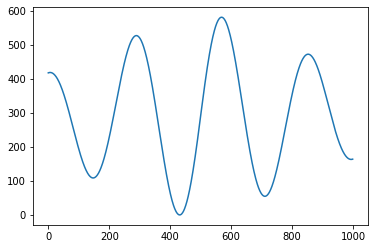

In [3]:
plt.plot(sim.x1)
plt.show()

In total there are nine transducers. The streamwise positions of the transducers are the variables px1,...,px9 and the corresponding measured pressure is stored in variables p1,...,p9. We plot an example of the pressure profile at t=100. 

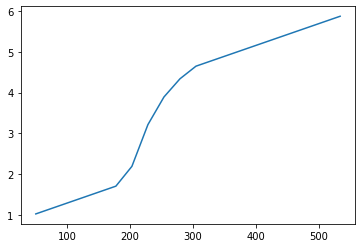

In [4]:
p_names = ["p"+str(i) for i in range(1,9)]
px_names = ["px"+str(i) for i in range(1,9)]
plt.plot(sim.iloc[100][px_names],sim.iloc[100][p_names])
plt.show()

First we'll use the app_stle package to create a Tracker object

In [5]:
import app_stle as app
tkr = app.Tracker()

At each timepoint we then get the transducer x locations 'x' and the pressures 'p' and pass them to the predict function. We save the tracked position in 'tracked' and the variance of the estimate in 'var'

In [6]:
import numpy as np

tracked = [] # tracked position by APP
var = [] # variance of APP estimate

for i in range(len(sim.x1)):
    x = np.array(sim.iloc[i][px_names],dtype='float64')
    p = np.array(sim.iloc[i][p_names],dtype='float64')
    out = tkr.predict(x,p)
    tracked.append(out['est'])
    var.append(out['est_cov'])

We can plot the results and see that APP does a good job of determining the true STLE location. Here the blue is the true STLE location 'x1', the orange line is the APP estimate and the orange interval is an approximate 95% confidence interval for this APP estimate.

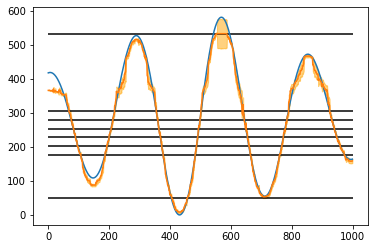

In [7]:
plt.plot(sim.x1)
plt.plot(tracked)
# an approx 95% confidence interval
plt.fill_between(np.arange(1000),tracked-2*np.sqrt(var),tracked+2*np.sqrt(var),alpha=.5,color='orange')
plt.hlines(x,xmin=0,xmax=1000)
plt.show()